In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('bw.png',cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

In [3]:
#bi_gray
bi_gray_max = 255
bi_gray_min = 20
ret,thresh=cv2.threshold(gray, bi_gray_min, bi_gray_max, cv2.THRESH_BINARY);

#Correcting some weird white-side effect
thresh[:,-1]=0

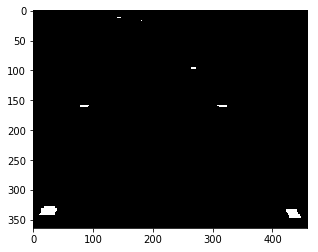

In [4]:
plt.imshow(thresh, cmap='gray')
plt.show()

In [5]:
img_points = np.zeros((6,2,1))

# find contours in the binary image
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i = 0
for index, c in enumerate(contours):
    # calculate moments for each contour
    M = cv2.moments(c)
    if M["m00"] == 0:
        continue   
    
    # calculate x,y coordinate of center
    cX = M["m10"] / M["m00"]
    cY = M["m01"] / M["m00"]
    img_points[i]=np.array([[cX],[cY]])
    i = i + 1

In [6]:
img_points

array([[[ 433.63465553],
        [ 339.16075157]],

       [[  25.69032922],
        [ 335.01748971]],

       [[ 315.85490196],
        [ 159.42745098]],

       [[  84.94835681],
        [ 159.44131455]],

       [[ 267.        ],
        [  96.5       ]],

       [[ 180.66666667],
        [  17.66666667]]])

In [7]:
fx = 614.1699
fy = 614.9002
cx = 329.9491
cy = 237.2788

camera_mat = np.zeros((3,3,1))
camera_mat[:,:,0] = np.array([[fx, 0, cx],[0, fy, cy], [0, 0, 1]])

k1 = 0.1115
k2 = -0.1089
p1 = 0
p2 = 0

dist_coeffs = np.zeros((4,1))
dist_coeffs[:,0] = np.array([[k1, k2, p1, p2]])

# far to close, left to right (order of discovery) in cm 
obj_points = np.zeros((6,3,1))
obj_points[:,:,0] = np.array([[0.0, 0.0, 0.0],[21.8, 0.0, 0.0], [0.0, 30.0, 0.0], [22.2, 30.0, 0.0], [0.0, 60.0, 0.0], [22.0, 60.0, 0.0]])

retval, rvec, tvec = cv2.solvePnP(obj_points, img_points,camera_mat, dist_coeffs)

print("Rotation Vector: \n{}\n".format(rvec))
print("Translation Vector: \n{}\n".format(tvec))

Rotation Vector: 
[[-0.39491542]
 [ 1.55812789]
 [ 2.63231691]]

Translation Vector: 
[[  5.53788456]
 [  6.72758698]
 [ 37.67713628]]



In [8]:
#Start Aufgabe 6
rmat = np.zeros((3,3))
cv2.Rodrigues(rvec, rmat, jacobian=0)
print(rmat)

[[-0.96559619 -0.17814543 -0.18944181]
 [-0.08037901 -0.48835784  0.86893373]
 [-0.24731197  0.85426625  0.45723732]]


In [11]:
import math
sy = math.sqrt(rmat[0][0] * rmat[0][0] +  rmat[1][0] * rmat[1][0])
     
singular = sy < 1e-6
 
if  not singular :
    x = math.atan2(rmat[2][1] , rmat[2][2])
    y = math.atan2(-rmat[2][0], sy)
    z = math.atan2(rmat[1][0], rmat[0][0])
else :
    x = math.atan2(-rmat[1][2], rmat[1][1])
    y = math.atan2(-rmat[2][0], sy)
    z = 0
     
print("angles: {}".format([x, y, z]))

angles: [1.079355880870383, 0.24990505800725415, -3.0585412529850915]
